# Setup and imports

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Load and Normalize Data 

In [26]:
df = pd.read_csv('data/teleCust1000t.csv')

In [27]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
y = df['custcat']

In [28]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Training and Evaluating

In [30]:
def evaluate_model(model, data, labels):
    predicted_labels = model.predict(data)
    accuracy = accuracy_score(labels, predicted_labels)
    cm = confusion_matrix(labels, predicted_labels)
    
    return {
        'Accuracy': accuracy,
        'silhouette': silhouette_score(data, predicted_labels),
        'ari': adjusted_rand_score(labels, predicted_labels),
        'nmi': normalized_mutual_info_score(labels, predicted_labels),
        'Confusion Matrix': cm,
        'labels': labels,
        'predicted_labels': predicted_labels
    }

In [31]:
k = 4
metrics = ['euclidean', 'manhattan', 'minkowski']

results = {}

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=k, metric=metric).fit(X_train, y_train)
    results[metric] = evaluate_model(model, X_test, y_test)

In [32]:
train_results = {}

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=k, metric=metric).fit(X_train, y_train)
    train_results[metric] = evaluate_model(model, X_train, y_train)

# Plot clusters

In [33]:
def plot_clusters(data, labels, predicted_labels, title):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50, label='Actual Clusters')
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=predicted_labels, cmap='viridis', s=20, marker='x', label='Predicted Clusters')
    plt.title(title)
    plt.legend()
    plt.colorbar()
    plt.show()


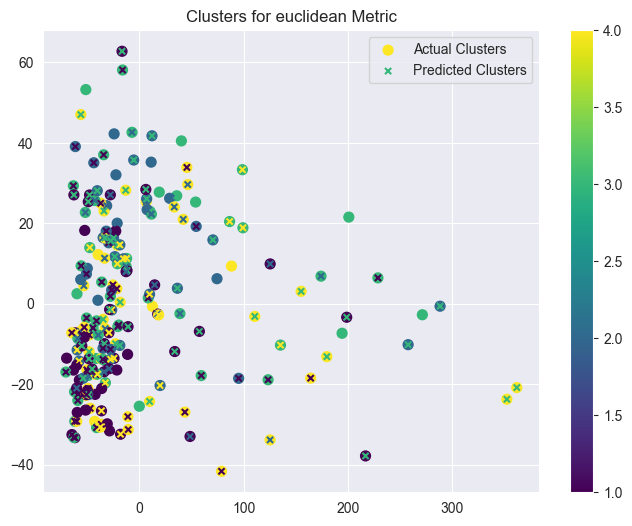

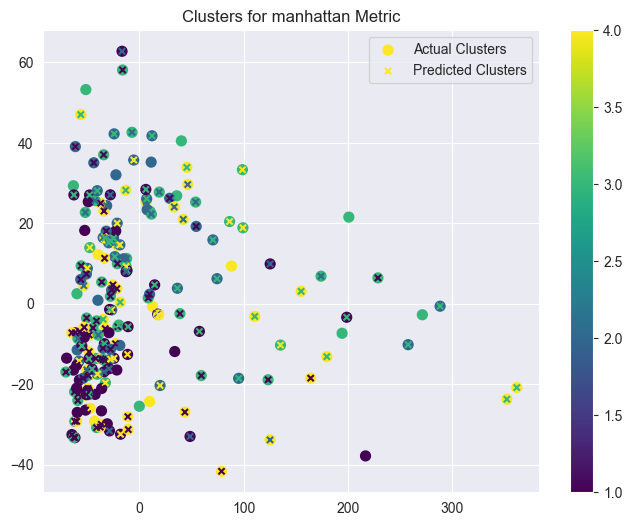

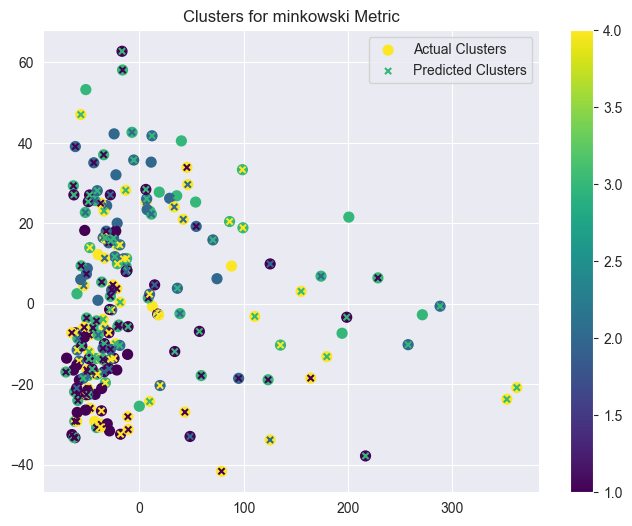

In [34]:
for metric, labels, predicted_labels in [(metric, results[metric]['labels'], results[metric]['predicted_labels']) for metric in metrics]:
    plot_clusters(X_test, labels, predicted_labels, f'Clusters for {metric} Metric')

# Test results

Metrics for euclidean Metric:
Accuracy: 0.26
ARI: 0.00011363102832315159
NMI: 0.013920867116718147
Silhouette: -0.0835584118844423


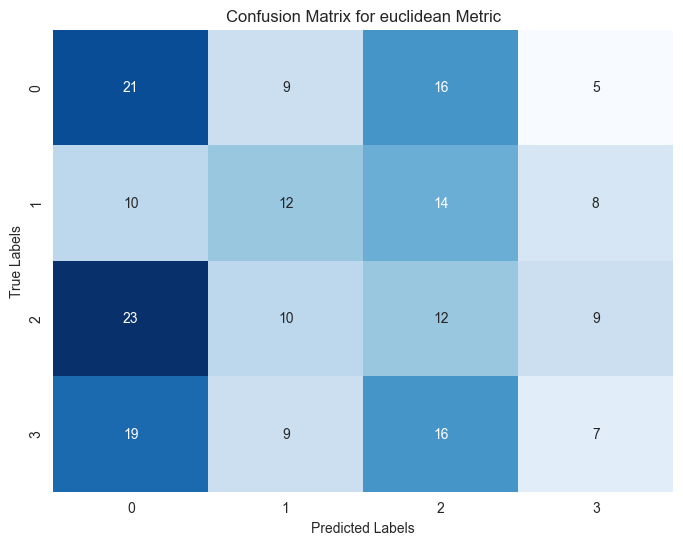

Metrics for manhattan Metric:
Accuracy: 0.265
ARI: 0.0044457208106871236
NMI: 0.01787329961454417
Silhouette: -0.04569159980998176


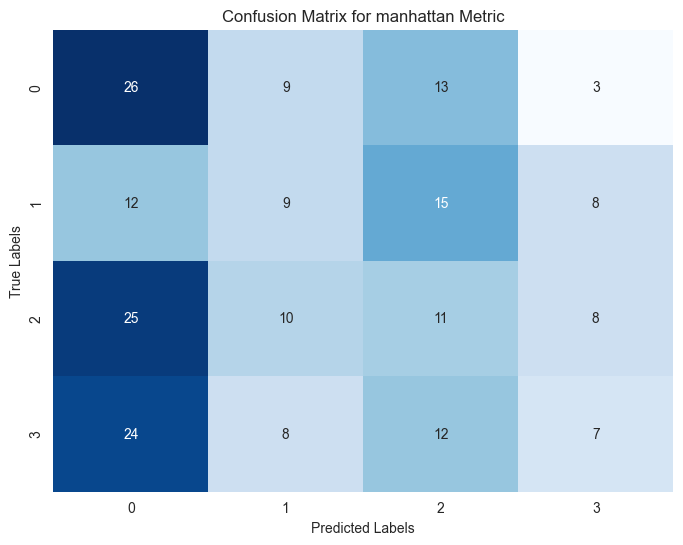

Metrics for minkowski Metric:
Accuracy: 0.26
ARI: 0.00011363102832315159
NMI: 0.013920867116718147
Silhouette: -0.0835584118844423


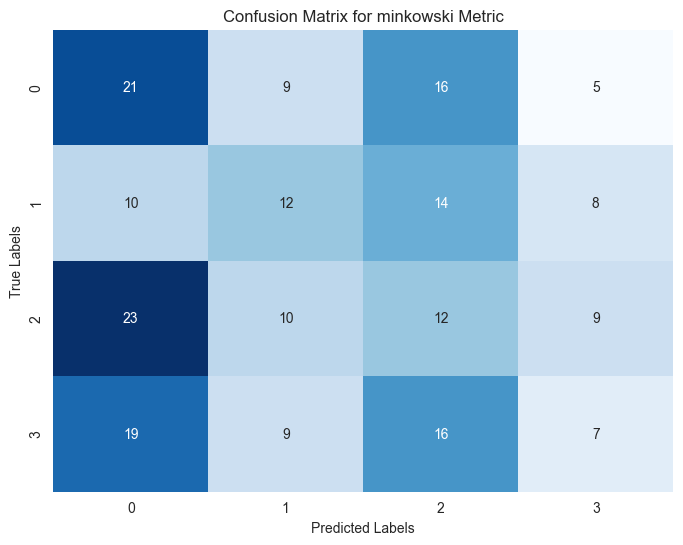

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    result = results[metric]
    
    # Display the evaluation metrics
    print(f"Metrics for {metric} Metric:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"ARI: {result['ari']}")
    print(f"NMI: {result['nmi']}")
    print(f"Silhouette: {result['silhouette']}")
    print("\n")
    
    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {metric} Metric')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Train results

Metrics for euclidean Metric:
Accuracy: 0.5575
ARI: 0.16947238213401053
NMI: 0.16873846440793605
Silhouette: -0.08187295555060585


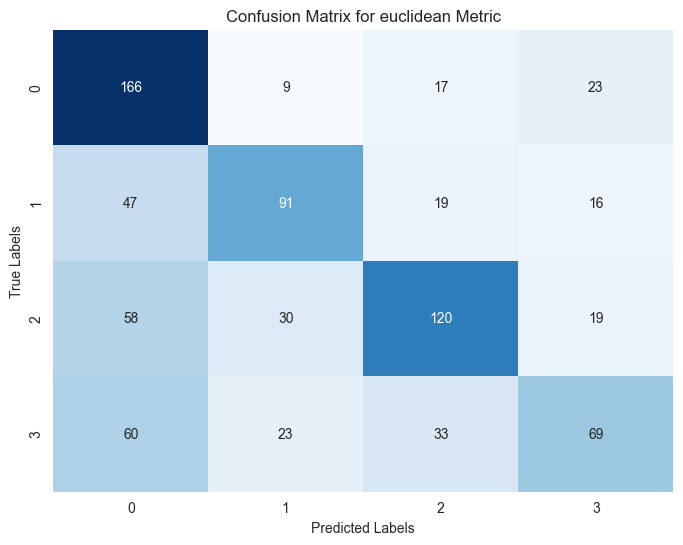

Metrics for manhattan Metric:
Accuracy: 0.57625
ARI: 0.19310040144301413
NMI: 0.1815314530160332
Silhouette: -0.09073448854892266


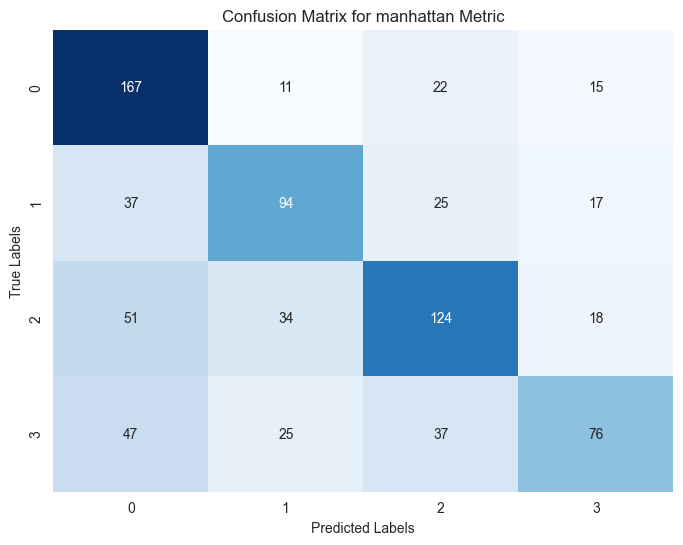

Metrics for minkowski Metric:
Accuracy: 0.5575
ARI: 0.16947238213401053
NMI: 0.16873846440793605
Silhouette: -0.08187295555060585


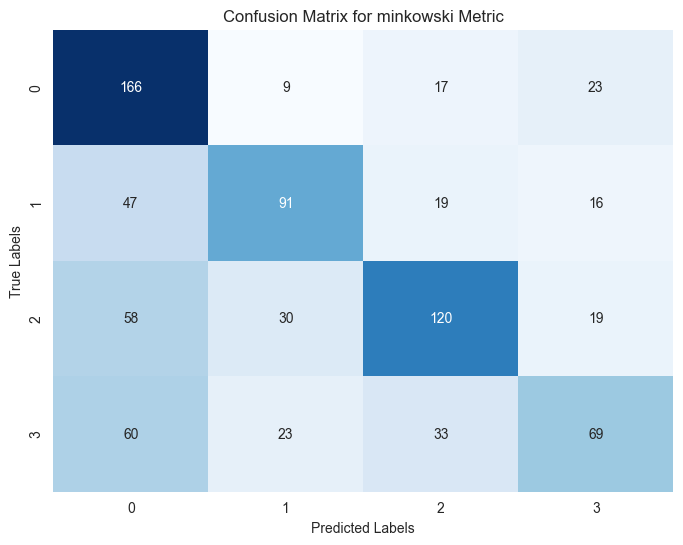

In [36]:
for metric in metrics:
    result = train_results[metric]
    
    # Display the evaluation metrics
    print(f"Metrics for {metric} Metric:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"ARI: {result['ari']}")
    print(f"NMI: {result['nmi']}")
    print(f"Silhouette: {result['silhouette']}")
    print("\n")
    
    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {metric} Metric')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
